In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

In [40]:
import cv2
import numpy as np
import pytesseract
from googletrans import Translator
from matplotlib import pyplot as plt

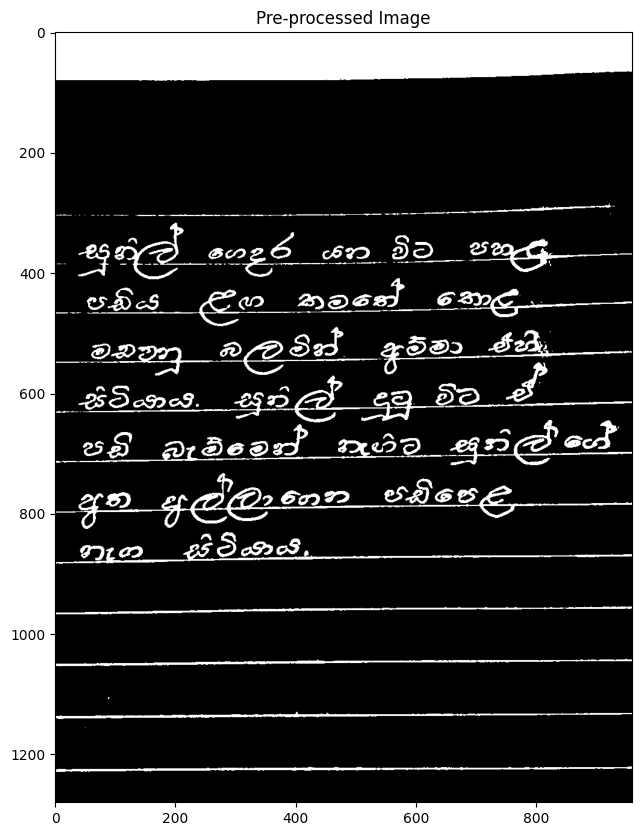

In [41]:
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply binary thresholding
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Display the processed image
    plt.figure(figsize=(10,10))
    plt.imshow(binary, cmap='gray')
    plt.title('Pre-processed Image')
    plt.show()

    return binary

# Example usage
image_path = '/content/drive/MyDrive/ocr_translation/images/test1.jpg'
processed_image = preprocess_image(image_path)


In [42]:
def recognize_characters(image):
    # Configure Tesseract to recognize Sinhala script
    config = '--oem 3 --psm 6 -l sin'

    # Perform OCR on the image
    text = pytesseract.image_to_string(image, config=config)

    print("Recognized Sinhala Text:")
    print(text)

    return text

# Example usage
recognized_text = recognize_characters(processed_image)


Recognized Sinhala Text:
෴෴෴෴෴෴෴෴෴෴෴෴෴෴හය
හත ද ප සාරය
රම දැවි සාගර. ව
__ ගනන බලඋළගික්‌ ආඇගිගා තු
හති මගී ය
රා ව ට්ව න්ද ක
_දුා ෴ැල්ළෑණ්‍යන එරිනෙළ
_ණදු්‍යා බමිංරාරරය ඞඔඛඔඛඞ෴෴ඈ& &



In [43]:
def translate_text(text, src_language='si', dest_language='en'):
    translator = Translator()
    translation = translator.translate(text, src=src_language, dest=dest_language)

    print("Translated Text:")
    print(translation.text)

    return translation.text

# Example usage
translated_text = translate_text(recognized_text)



Translated Text:
The
Seven and the EPF
Ruma is the oceans.In
__ Number of power is entered
The sight is passenger
Twg of
_
_Nula Divisional Secretariat Duard Ductu


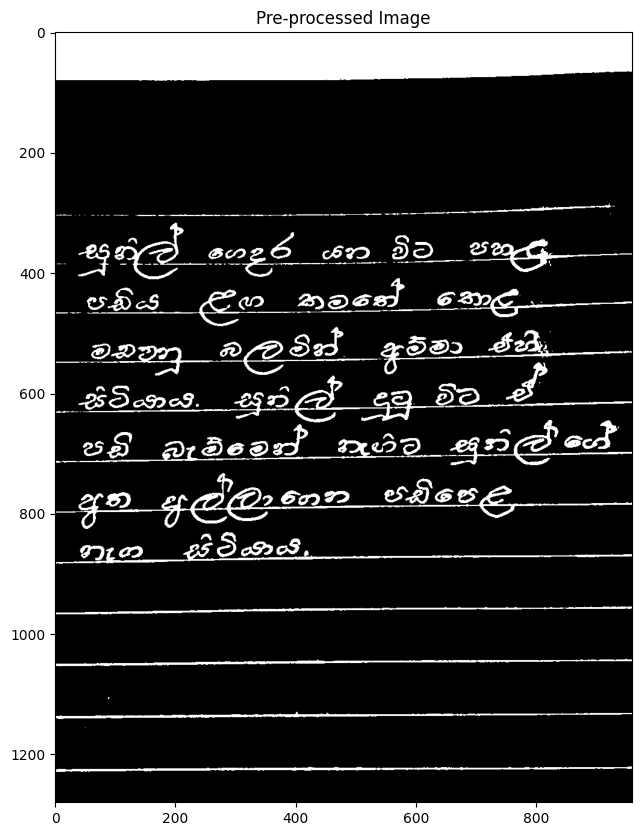

Recognized Sinhala Text:
෴෴෴෴෴෴෴෴෴෴෴෴෴෴හය
හත ද ප සාරය
රම දැවි සාගර. ව
__ ගනන බලඋළගික්‌ ආඇගිගා තු
හති මගී ය
රා ව ට්ව න්ද ක
_දුා ෴ැල්ළෑණ්‍යන එරිනෙළ
_ණදු්‍යා බමිංරාරරය ඞඔඛඔඛඞ෴෴ඈ& &

Translated Text:
The
Seven and the EPF
Ruma is the oceans.In
__ Number of power is entered
The sight is passenger
Twg of
_
_Nula Divisional Secretariat Duard Ductu


In [44]:
def ocr_translation_pipeline(image_path):
    # Pre-process the image
    processed_image = preprocess_image(image_path)

    # Recognize Sinhala characters
    recognized_text = recognize_characters(processed_image)

    # Translate the recognized text into English
    translated_text = translate_text(recognized_text)

    return translated_text

# Example usage
translated_output = ocr_translation_pipeline('/content/drive/MyDrive/ocr_translation/images/test1.jpg')


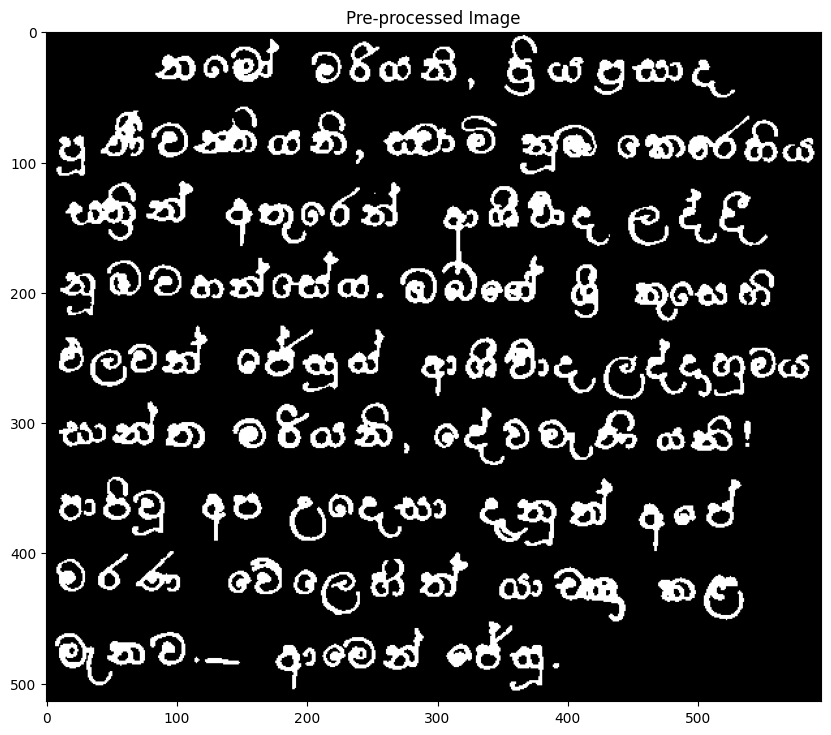

Recognized Sinhala Text:
ණනගම! ඉරියනි, ප්‍රිය ප්‍රසාද

පුණීවණයනි, සංර ධව.
ම ර්‌ ම්ම්‌
බක ව (යනය "1 ශ්‍රී නඉසඟි
එිලචන්‌ ව දලි! මව ම ලක ම
භාණ්නා ඉරියණි, දේවමැණි යනි!
පාපිමු ම්ම දැනු න්‌ අජ්‌
මරණ චේලෙහින්‌ න ලග
මැන'ව.._. ආමෙන්‌ ස

Translated Text:
KumanagamaPorenal bonus

Charity, Focus.
\ M
Bak (the number "1
Eilchan is neutral!Mother of the mother
Treasury posts, ghanma!
Patient Age
Death Charges
Measure .._.Amen


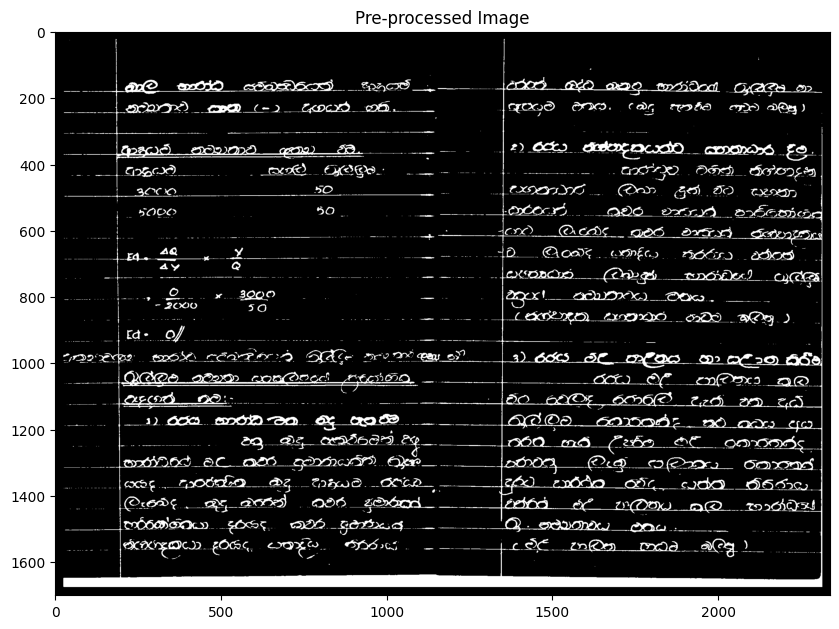

Recognized Sinhala Text:
“ණි ක ය කිට ය යවනවා ෴ාෂහහ්‍ය“ “ආාෂ්‍යා෴' ආාරාටුපආ ස එ ක ධාවක්‍
_.._._ ධා න්න වම්මී ධ -.-. ම මාකකේලෙන්න කැට ධක 19% 2.2 නා කකේම ණ වක අහං ය ව~ධකලව අධාර පරීම
අ෴෴෴෴෴ වධ නො කනක්‌ 2 ය ටූ ...। ඨෟ _පරුා ජ්‍යපාදකයාත්ට _ කංතායාර එම.
/ “ මයන්‌ - ~කහලක්‌ ඇඟල _ ම. 4 ෴ .._..... .. පරදා _ තඟහපා පතඌෆප්‍යදණු
| “න හ්‌ ~~ අපි. 222 ඒම ගොත දිය වරා රෝගා කර රාග
භවඹ් । ධමම කියා ගගේ රාධා ෴ඇ෴෴෴෴෴෴෴෴෴෴.
_. 1 ( - ඔය ධව ~~ ම එ ළා නන දැන නන
ම ය ය ම.  ..  ~ -... ට්‌  ලෑැළණද _ දාපාදුදා කරර එජථටත්‌ _
ඤ,ෂ॥ 2 ෴෴෴෴෴ශ෴යකං෴෴෴෴කමැර්්වකේන නබි යිරම්නන
_.........!। . එ  ්‌,॥...3රරටලට බ්‌ ූ අ“ ත්‌ ඟී
ක ගන්ව ද
.. _ | “රි හත ෂි ෴෴෴මකෞසපක 2 ම මා ගයා කමි. ය එක ක්‍ෂාර෴ය නො... රෙ
තු මැ දක්ව අඅධධා෴෴ූ෴අබ෴ූ ,සාහසඩසවබාං෴ා්‍යක්‍්ම්‌ ම ।
රා රමයවයි නර ක නාන කුරෑද වණ දා බක්‍ර රණ රක්ද එ 2) ෴. හෟ කරථ්‌52ඟ අතථම
න කේ ස
_ __| උආඌන්‌ න: ෂ॥. අ - |ැ න කාගෙ දි ) ක එය
තා ෴“““ක්තා වක
ම ෴෴෴෴෴෴෴ ක කො න මෝ මා තපප ඇැක උපබලා ආඋ අනාෟපතනද_
_ | ඟංරාඛ්පය_ ඈ උ_කවඵර_ එඋකෟපායකසතා දපානා ම. ව ධාකසන්දේන අ ගානයි
. ........। කලද ... ඌංපර්ක්රක තා

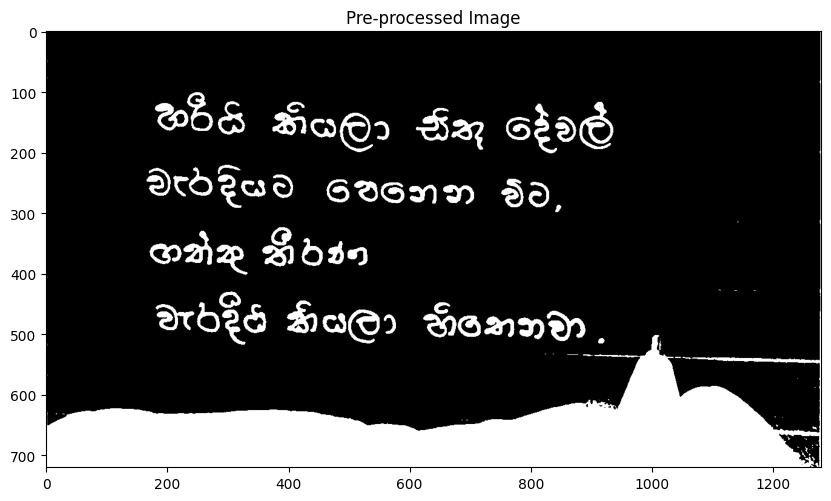

Recognized Sinhala Text:
න ඩි ලවර මට,
මබැර්ඳිසට ලඑලනුණ ඉට,
ලව වි විට 0
මැර්දිශ ණායලා ඟණෙනණු . 2

Translated Text:
NORTHED DEWARD,
Litnu to the guy
When the LEA is
Following maturity.2


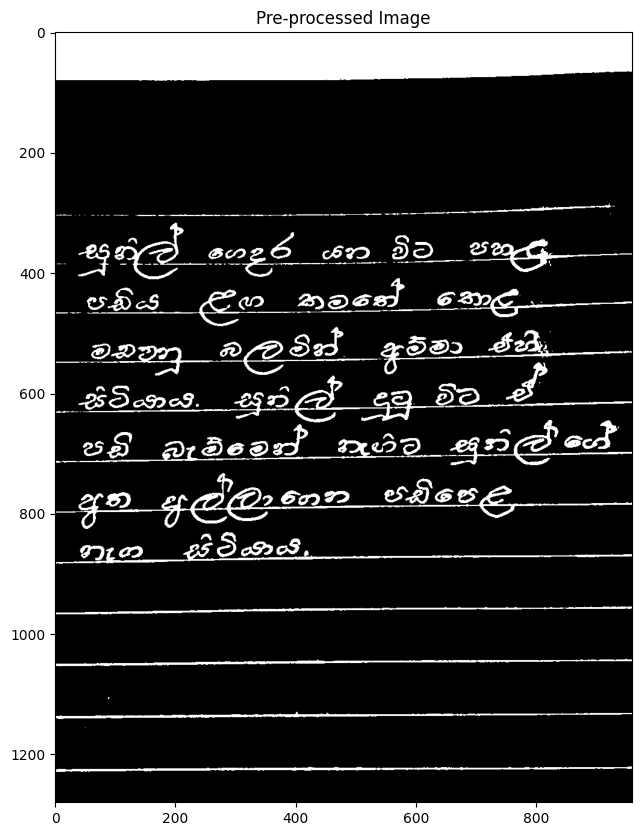

Recognized Sinhala Text:
෴෴෴෴෴෴෴෴෴෴෴෴෴෴හය
හත ද ප සාරය
රම දැවි සාගර. ව
__ ගනන බලඋළගික්‌ ආඇගිගා තු
හති මගී ය
රා ව ට්ව න්ද ක
_දුා ෴ැල්ළෑණ්‍යන එරිනෙළ
_ණදු්‍යා බමිංරාරරය ඞඔඛඔඛඞ෴෴ඈ& &

Translated Text:
The
Seven and the EPF
Ruma is the oceans.In
__ Number of power is entered
The sight is passenger
Twg of
_
_Nula Divisional Secretariat Duard Ductu
{'test3.jpg': 'KumanagamaPorenal bonus\n\nCharity, Focus.\n\\ M\nBak (the number "1\nEilchan is neutral!Mother of the mother\nTreasury posts, ghanma!\nPatient Age\nDeath Charges\nMeasure .._.Amen', 'test5.jpg': '"Sending the sending of the Kit to the"\n_..._._ Order Vismati White.Managalanna citects of Markectorate.\nThe use of torture 2 caught ..._ Arrangement for the General Assembly of Ut.\n/ "Men - AS4 ෴ .. ....... .. Owned _ Pattern\n|"You ~~ we.222 And the tumor illnesses\nBhawmb.Radha of the rice is the only way.\n_.1 (White ~~\nExpenditure.. ~... Mr. Ladders _\nAnd2 Spaidline Prophet Niriblers\n_...............................Baule bulled i

In [45]:
import os

def process_images_in_folder(folder_path):
    results = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            try:
                file_path = os.path.join(folder_path, filename)
                translated_text = ocr_translation_pipeline(file_path)
                results[filename] = translated_text
            except Exception as e:
                print(f"Error processing {filename}: {e}")
                results[filename] = "Error processing image"

    return results

# Example usage
folder_path = '/content/drive/MyDrive/ocr_translation/images'
results = process_images_in_folder(folder_path)
print(results)
